Using TensorFlow backend.


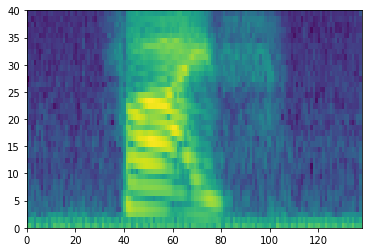

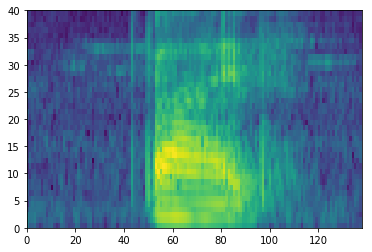

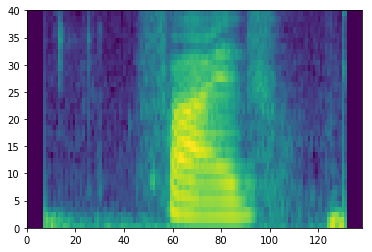

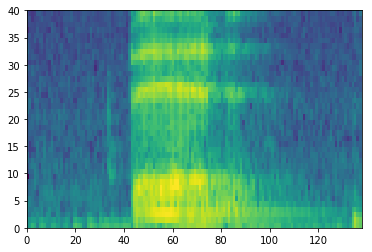

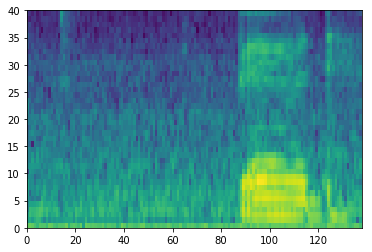

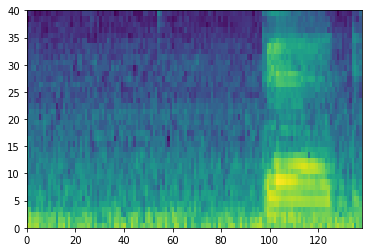

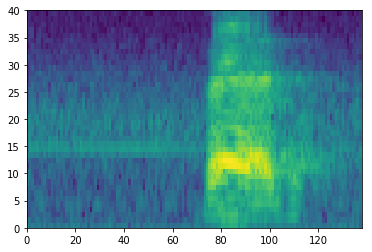

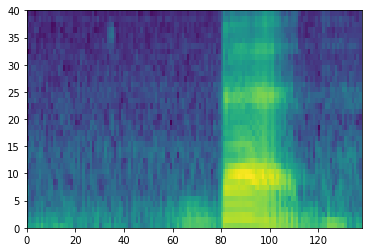

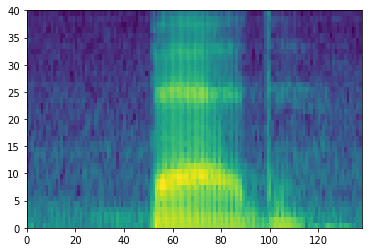

In [1]:
import os
import sys
sys.path.append('common')
import util, audio_preprocessing

import shutil
import numpy as np
import keras
import keras.backend as K
from keras.callbacks import ModelCheckpoint, Callback, TensorBoard
from matplotlib import pyplot as plt
%matplotlib inline
from cyclic_lr import CyclicLR

from dataset import SingleDataset
from model import model_cnn_alexnet

TRY = 'SCD1'
SCD_PREFIX = 'scd_'
LOG_DIR = './%slog' % TRY

batch_size = 32
epochs = 150

d = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)

# Confirmation
def plot_dataset(X, n=3):
    for i in range(n):
        x = X[i]
        plt.pcolormesh(x[..., -1])
        plt.show()
for X in [d.X_train, d.X_valid, d.X_test]:
    plot_dataset(X)

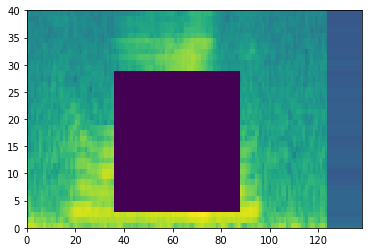

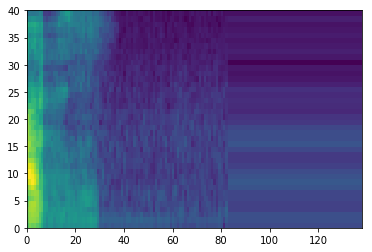

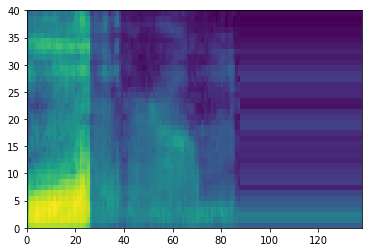

In [2]:
callbacks = [
    CyclicLR(base_lr=0.00007, max_lr=0.0007, step_size=d.X_train.shape[0] // batch_size, mode='triangular'),
    ModelCheckpoint('model%s.h5' % TRY,
                monitor='val_acc',
                verbose=1,
                save_best_only=True,
                save_weights_only=True),
     keras.callbacks.TensorBoard(log_dir=LOG_DIR, histogram_freq=0, write_graph=True, write_images=True)
]

# Clean up log
shutil.rmtree(LOG_DIR, ignore_errors=True)

for b in d.train_generator:
    for X in [b[0][:5]]:
        plot_dataset(X)
    break

In [3]:
model = model_cnn_alexnet(d.X_train.shape[1:], d.num_classes)
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(lr=0.0001),
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 20, 46, 48)        5856      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 22, 48)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 18, 22, 48)        192       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 9, 8, 128)         153728    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 3, 128)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 4, 3, 128)         512       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 3, 192)         221376    
__________

In [5]:
model.fit_generator(d.train_generator,
                    steps_per_epoch=d.X_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=d.valid_generator, callbacks=callbacks)

Epoch 1/150
1593/1596 [============================>.] - ETA: 0s - loss: 3.4204 - acc: 0.0524
Epoch 00001: val_acc improved from -inf to 0.14637, saving model to modelSCD1X.h5
1596/1596 [==============================] - 16s 10ms/step - loss: 3.4200 - acc: 0.0525 - val_loss: 2.8163 - val_acc: 0.1464
Epoch 2/150
1594/1596 [============================>.] - ETA: 0s - loss: 3.0481 - acc: 0.1538
Epoch 00002: val_acc improved from 0.14637 to 0.32568, saving model to modelSCD1X.h5
1596/1596 [==============================] - 16s 10ms/step - loss: 3.0478 - acc: 0.1539 - val_loss: 2.2221 - val_acc: 0.3257
Epoch 3/150
1592/1596 [============================>.] - ETA: 0s - loss: 2.8970 - acc: 0.2186
Epoch 00003: val_acc improved from 0.32568 to 0.43027, saving model to modelSCD1X.h5
1596/1596 [==============================] - 16s 10ms/step - loss: 2.8970 - acc: 0.2187 - val_loss: 1.9038 - val_acc: 0.4303
Epoch 4/150
1590/1596 [============================>.] - ETA: 0s - loss: 2.7296 - acc: 0.30

Epoch 30/150
1593/1596 [============================>.] - ETA: 0s - loss: 1.9057 - acc: 0.6847
Epoch 00030: val_acc improved from 0.92159 to 0.92395, saving model to modelSCD1X.h5
1596/1596 [==============================] - 16s 10ms/step - loss: 1.9057 - acc: 0.6847 - val_loss: 0.3733 - val_acc: 0.9239
Epoch 31/150
1593/1596 [============================>.] - ETA: 0s - loss: 1.8858 - acc: 0.6899
Epoch 00031: val_acc did not improve
1596/1596 [==============================] - 16s 10ms/step - loss: 1.8855 - acc: 0.6899 - val_loss: 0.3949 - val_acc: 0.9075
Epoch 32/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.8869 - acc: 0.6916
Epoch 00032: val_acc did not improve
1596/1596 [==============================] - 16s 10ms/step - loss: 1.8870 - acc: 0.6916 - val_loss: 0.3620 - val_acc: 0.9239
Epoch 33/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.8709 - acc: 0.6956
Epoch 00033: val_acc did not improve
1596/1596 [==============================] - 16s 

Epoch 61/150
1591/1596 [============================>.] - ETA: 0s - loss: 1.7655 - acc: 0.7302
Epoch 00061: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7652 - acc: 0.7303 - val_loss: 0.3308 - val_acc: 0.9338
Epoch 62/150
1591/1596 [============================>.] - ETA: 0s - loss: 1.7718 - acc: 0.7280
Epoch 00062: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7719 - acc: 0.7280 - val_loss: 0.2984 - val_acc: 0.9351
Epoch 63/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.7540 - acc: 0.7349
Epoch 00063: val_acc did not improve
1596/1596 [==============================] - 18s 11ms/step - loss: 1.7542 - acc: 0.7348 - val_loss: 0.3359 - val_acc: 0.9276
Epoch 64/150
1591/1596 [============================>.] - ETA: 0s - loss: 1.7677 - acc: 0.7308
Epoch 00064: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7672 - acc: 0.7309 - val_los

Epoch 93/150
1593/1596 [============================>.] - ETA: 0s - loss: 1.7032 - acc: 0.7458
Epoch 00093: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7031 - acc: 0.7458 - val_loss: 0.3331 - val_acc: 0.9295
Epoch 94/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.7098 - acc: 0.7441
Epoch 00094: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7096 - acc: 0.7441 - val_loss: 0.2702 - val_acc: 0.9425
Epoch 95/150
1594/1596 [============================>.] - ETA: 0s - loss: 1.6974 - acc: 0.7492
Epoch 00095: val_acc did not improve
1596/1596 [==============================] - 18s 11ms/step - loss: 1.6975 - acc: 0.7491 - val_loss: 0.2943 - val_acc: 0.9282
Epoch 96/150
1595/1596 [============================>.] - ETA: 0s - loss: 1.7106 - acc: 0.7474
Epoch 00096: val_acc did not improve
1596/1596 [==============================] - 17s 11ms/step - loss: 1.7105 - acc: 0.7474 - val_los

KeyboardInterrupt: 

In [7]:
# CONFIRMATION ON INITIAL TRAINING
model.load_weights('model%s.h5' % TRY)
results = model.evaluate_generator(d.valid_generator)
print(model.metrics_names, results)

['loss', 'acc'] [0.26739106745308167, 0.9442483083259783]


In [8]:
# CONFIRMATION ON INITIAL TRAINING
model.load_weights('model%s.h5' % TRY)
y_valid_preds = model.predict_generator(d.valid_generator)
y_valid_pred_cls = [np.argmax(pred) for pred in y_valid_preds]
y_valid_refs = [np.argmax(y) for y in d.y_valid]

np.save('preds%s4valid.npy' % TRY, y_valid_preds)
valid_results = [result == ref for result, ref in zip(y_valid_pred_cls, y_valid_refs)]

# accuracy
print(np.sum(valid_results)/len(valid_results))

# double check answers
for result, ref in zip(y_valid_pred_cls[:10], y_valid_refs[:10]):
    print(result, '\t', ref)

0.9442483083259783
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14


In [9]:
# CONFIRMATION w/ test set
model.load_weights('model%s.h5' % TRY)
y_test_preds = model.predict_generator(d.test_generator)
y_test_pred_cls = [np.argmax(pred) for pred in y_test_preds]
y_test_refs = [np.argmax(y) for y in d.y_test]
test_results = [result == ref for result, ref in zip(y_test_pred_cls, y_test_refs)]

# accuracy
print(np.sum(test_results)/len(test_results))

# double check answers
for result, ref in zip(y_test_pred_cls[:10], y_test_refs[:10]):
    print(result, '\t', ref)

0.9482077542062911
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14
14 	 14


## Evaluate when mixed with urban sound (scd 60%, usd 40%)

In [8]:
scd = SingleDataset(SCD_PREFIX,
                   util.load_txt_list(os.path.join('.', SCD_PREFIX+'classes.txt')),
                   batch_size)
usd = SingleDataset('usd_',
                   ['air_conditioner',  'car_horn', 'children_playing', 'dog_bark', 'drilling',
                    'engine_idling', 'gun_shot','jackhammer', 'siren', 'street_music'],
                   batch_size)
from dataset import MultiDataset
multi = MultiDataset([scd, usd], x_mix_ratio=[0.6, 0.4], mix_randomness=0.0)

In [14]:
model.load_weights('model%s.h5' % TRY)
results = model.evaluate_generator(multi.vaild_single_generator(),  steps=scd.sizeof_validset())
print(model.metrics_names, results)

['loss', 'acc'] [0.44077422270670785, 0.8642247719917623]
